# Graded Exercise 1: Quadratic integrate and fire

first name: ...

last name: ...

sciper: ...

date: ...

*Your teammate*

first name of your teammate: ...

last name of your teammate: ...

sciper of your teammate: ...


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.


** Submission **

Rename this notebook to Ex1_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

## 1.1 Quadratic Integrate and Fire neuron [20 points]
This exercise is not available online. All information is given here.

1.1.1 Read the book chapter about the quadratic integrate and fire neuron
https://neuronaldynamics.epfl.ch/online/Ch5.S3.html

[0 point]

1.1.2 Implement the quadratic integrate and fire neuron in Brian2:

* Follow the [source]-link in the documentation to get the Python source code of the exponential integrate and fire neuron. https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.exponential_integrate_fire.html
* Find the one function that implements the exponential LIF. Copy that function into this notebook. Rename the function, change it's parameters and modify the dynamics from the exponential to the quadratic equation (Equation 5.16 in the book).

[6 points]

1.1.3 Call your function: 
As above, inject a current into your neuron and plot the response.


[2 points]

1.1.4 Approximate the exponential model
* The quadratic model has three parameters: a0, v_rest and vc (note that this v_rest is different from the v_rest of the exponential model). They can be chosen such that the quadratic model approximates the exponential model. Read the box "Example: Approximating the exponential integrate-and-fire" in chapter http://neuronaldynamics.epfl.ch/online/Ch5.S3.html and make sure you understand figure 5.8.
* On paper, find the equations that express the parameters a0, v_rest and vc (in terms of the parameters of the exponential model) such that the two models are matched (in value, slope and curvature) at the rheobase threshold.
* In code, compute the values of a0, v_rest and vc using the values provided in the exp_IF module.


[4 points]

1.1.5 Simulate the quadratic- and the exponential model
* Inject the same current into an exponential- and into your (matched) quadratic model. Set the current duration to 1 second and the amplitude to I_Rh + 0.030 * b2.namp  (I_Rh as computed in exercise 3.1). Simulate for 1 second and plot the voltage responses.


** Link to the exercise 3.1 **

<http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/exponential-integrate-and-fire.html>

[3 point]

1.1.6 Discuss your observation


[5 point]


In [2]:
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory
import brian2 as b2

# copy the simulation function here and modify it


In [3]:
# 1.1.4 Approximate the exponential model (solve it on paper, use the final expressions here)

A_0 = 1./ exp_IF.RHEOBASE_THRESHOLD_v_rh  # replace this expression with the correct formula.
print(A_0)
V_rest = 123 * b2.mV # replace this expression with the correct formula.
print(V_rest)
V_C = exp_IF.V_REST + 0.*b2.mV  # replace this expression with the correct formula.
print(V_C)

-18.18181818 m^-2 kg^-1 s^3 A
123. mV
-65. mV


In [ ]:
# 1.1.5 Simulate the quadratic- and the exponential model

# your code goes here. Use the parameters A_0 V_rest and V_C computed in 3.3.4

## 1.1.6 Discuss your observation

Explain your observations here. Qualitatively compare the voltage traces of the exponential- and the quadratic model. Is the number of spikes the same for the two models?

# Ex. 2. AdEx: the Adaptive Exponential Integrate-and-Fire model

Use function [`AdEx.simulate_AdEx_neuron()`](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.adex_model.html) to run the model for different input currents and different parameters. Get started by running the following script:

In [1]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory


## 2.1. Exercise: Adaptation and firing patterns [7 points]

We have implemented an Exponential Integrate-and-Fire model with a single adaptation current
$\begin{split}\left[\begin{array}{ccll}
{\displaystyle \tau_m \frac{du}{dt}} &=& -(u-u_{rest}) + \Delta_T exp(\frac{u-\vartheta_{rh}}{\Delta_T}) - R w + R I(t) \\[.2cm]
{\displaystyle \tau_w \frac{dw}{dt}} &=& a (u-u_{rest}) -w  + b \tau_w \sum_{t^{(f)}} \delta (t - t^{(f)})
 \\[.2cm]
\end{array}\right.\end{split}$

- When you simulate the model with the default parameters, it produces the voltage trace shown above. Describe that firing pattern. Use the terminology of Fig. 6.1 in [Chapter 6.1](https://neuronaldynamics.epfl.ch/online/Ch6.S1.html) [max 2 lines, 1 point]

With default parameters, it produces an "initial burst" firing pattern.Indeed, we can see multiple quick spikes at first, before it becomes more spaced, with a constant period between each.

- Call the function `AdEx.simulate_AdEx_neuron()` with different parameters and try to create adapting, bursting and irregular firing patterns. Table 6.1 in Chapter 6.1 provides a starting point for your explorations. 

**Note:** If you want to set a parameter to 0, Brian still expects a unit. Therefore use `a=0*b2.nS` instead of `a=0`.

If you do not specify any parameter, the following default values are used:

`MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms`

`MEMBRANE_RESISTANCE_R = 500*b2.Mohm`

`V_REST = -70.0 * b2.mV`

`V_RESET = -51.0 * b2.mV`

`RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV`

`SHARPNESS_delta_T = 2.0 * b2.mV`

`ADAPTATION_VOLTAGE_COUPLING_a = 0.5 * b2.nS`

`ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms`

`SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA`

[2 points]

nr of spikes: 15


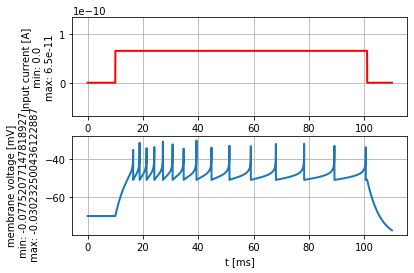

In [16]:
# adapting 

current = input_factory.get_step_current(10, 100, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=110 * b2.ms,
                                                         tau_w=100 * b2.ms, 
                                                         b=3 * b2.pA, 
                                                         a=0 * b2.nsiemens)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

[2 points]

nr of spikes: 16


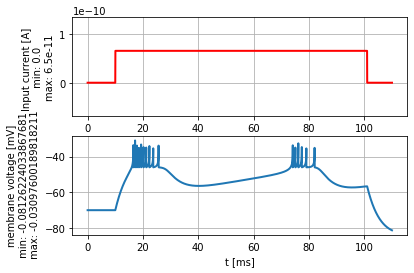

In [15]:
# bursting firing pattern from book

current = input_factory.get_step_current(10, 100, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=110 * b2.ms,
                                                        tau_w=50 * b2.ms, 
                                                         b=5 * b2.pA, 
                                                         v_reset= -46 * b2.mvolt)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

[2 points]

nr of spikes: 19


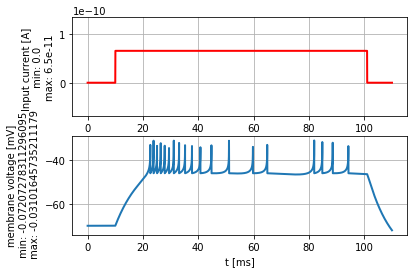

In [14]:
# irregular firing pattern

current = input_factory.get_step_current(10, 100, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=110 * b2.ms,
                                                         tau_w=80 * b2.ms, 
                                                         tau_m=9.9 * b2.ms,
                                                         b=5 * b2.pA, 
                                                         a=-0.5 * b2.nsiemens,
                                                         v_reset= -46 * b2.mvolt)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## 2.2. Exercise: phase plane and nullclines [12 points]

First, try to get some intuition on shape of nullclines by plotting or simply sketching them on a piece of paper and answering the following questions.
Plot or sketch the u- and w- nullclines of the AdEx model (`I(t) = 0`)
- What is the direction of the flow arrows on the u-nullcline ?
- How do the nullclines change with respect to `a`?
- What is the interpretation of parameter `b`?
- How do flow arrows change as tau_w gets bigger?

[max 10 lines, 4 points]

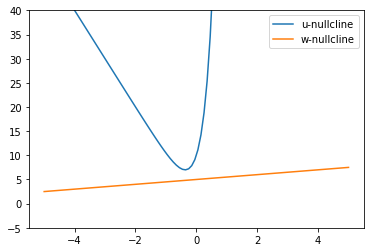

In [105]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,100)
y = (-x + np.exp(3*x)) * 10
z = 0.5*x + 5

axes = plt.gca()
axes.set_ylim([-5,40])

plt.plot(x,y, label='u-nullcline')
plt.plot(x,z, label='w-nullcline')

plt.legend(loc='upper right')

plt.show()

The nullcines would look something similar to this, with different parameters (for example it would not be centered around 0).

- Flow arrows on this u-nullcline are always vertical, in most cases going down.

- `a` parameter determines the slope of the w-nullcline

- While `b` modifies the "height" of the w-nullcline. We can see this function as something similar to `y = a*x + b`. This can be interpreted as the increase in the current during a spike.

- `tau_w` is the duration of a spike. However, we see from the equation that $\frac{dw}{dt}=\frac{G(u,w)}{\tau_w}$. So, when it gets bigger, the arrows will be more and more horizontal.

Take `a = 0`. Find a set of parameters such that, by changing `b` only, we can see two qualitatively different firing patterns. Simulate these two patterns and write their names.

[4 points]

nr of spikes: 4


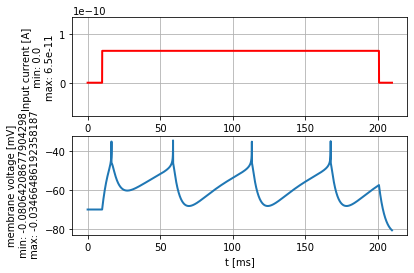

In [28]:
# First firing pattern (simulation [2 points] and pattern name [2 points])

current = input_factory.get_step_current(10, 200, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=210 * b2.ms,
                                                         tau_w=40 * b2.ms, 
                                                         v_reset= -46 * b2.mvolt,
                                                         a=0 * b2.nsiemens,
                                                         b=60 * b2.pA)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

- This is a tonic firing pattern

[4 points]

nr of spikes: 28


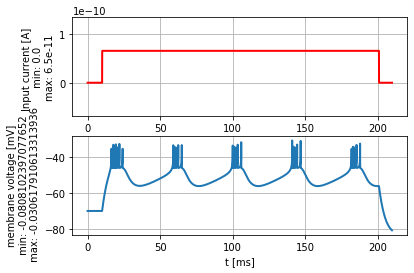

In [26]:
# Second firing pattern (simulation [2 points] and pattern name [2 points])

current = input_factory.get_step_current(10, 200, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=210 * b2.ms,
                                                         tau_w=40 * b2.ms, 
                                                         v_reset= -46 * b2.mvolt,
                                                         a=0 * b2.nsiemens,
                                                         b=7 * b2.pA)

plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

- This is a regular burst firing pattern